In [71]:
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

import warnings
warnings.filterwarnings("ignore")

In [72]:
file_name = "Bakery_Dataset.csv"

df = pd.read_csv(file_name)

print(df.head())

         Date      Time  Transaction           Item
0  2016-10-30  09:58:11            1          Bread
1  2016-10-30  10:05:34            2   Scandinavian
2  2016-10-30  10:05:34            2   Scandinavian
3  2016-10-30  10:07:57            3  Hot chocolate
4  2016-10-30  10:07:57            3            Jam


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [74]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [75]:
missing_value = ["NaN", "NONE", "None", "Nil", "nan", "none", "nil", 0]
print("There are {0} missing values in the dataframe.".format(len(df[df.Item.isin(missing_value)])))
df[df.Item.isin(missing_value)].head(10)

There are 786 missing values in the dataframe.


,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
85,2016-10-30,11:55:51,40,NONE
126,2016-10-30,13:02:04,59,NONE
140,2016-10-30,13:37:25,65,NONE
149,2016-10-30,13:46:48,67,NONE
167,2016-10-30,14:32:26,75,NONE


In [76]:
data = df.drop(df[df.Item == "NONE"].index)
data = df[df.Transaction>0]
print("Number of rows: {0}".format(len(data)))
data.head(10)

Number of rows: 21293


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [77]:
data['Item'].value_counts().to_dict()

{'Coffee': 5471,
 'Bread': 3325,
 'Tea': 1435,
 'Cake': 1025,
 'Pastry': 856,
 'NONE': 786,
 'Sandwich': 771,
 'Medialuna': 616,
 'Hot chocolate': 590,
 'Cookies': 540,
 'Brownie': 379,
 'Farm House': 374,
 'Muffin': 370,
 'Juice': 369,
 'Alfajores': 369,
 'Soup': 342,
 'Scone': 327,
 'Toast': 318,
 'Scandinavian': 277,
 'Truffles': 193,
 'Coke': 185,
 'Spanish Brunch': 172,
 'Fudge': 159,
 'Baguette': 152,
 'Jam': 149,
 'Tiffin': 146,
 'Mineral water': 136,
 'Jammie Dodgers': 125,
 'Chicken Stew': 123,
 'Hearty & Seasonal': 107,
 'Salad': 99,
 'Frittata': 81,
 'Smoothies': 77,
 'Keeping It Local': 63,
 'The Nomad': 58,
 'Focaccia': 54,
 'Vegan mincepie': 54,
 'Bakewell': 48,
 'Tartine': 47,
 'Afternoon with the baker': 44,
 'Extra Salami or Feta': 38,
 'Art Tray': 38,
 'Eggs': 28,
 'Granola': 28,
 'Tshirt': 21,
 'My-5 Fruit Shoot': 18,
 "Ella's Kitchen Pouches": 17,
 'Vegan Feast': 16,
 'Crisps': 14,
 'Dulce de Leche': 13,
 "Valentine's card": 13,
 'Kids biscuit': 12,
 'Duck egg': 12,

In [78]:
counts = data['Item'].value_counts()

percent = data['Item'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

top_10 = pd.DataFrame({'counts': counts, '%': percent})

top_10.head(10)

,counts,%
Item,,
Coffee,5471,25.7%
Bread,3325,15.6%
Tea,1435,6.7%
Cake,1025,4.8%
Pastry,856,4.0%
NONE,786,3.7%
Sandwich,771,3.6%
Medialuna,616,2.9%
Hot chocolate,590,2.8%


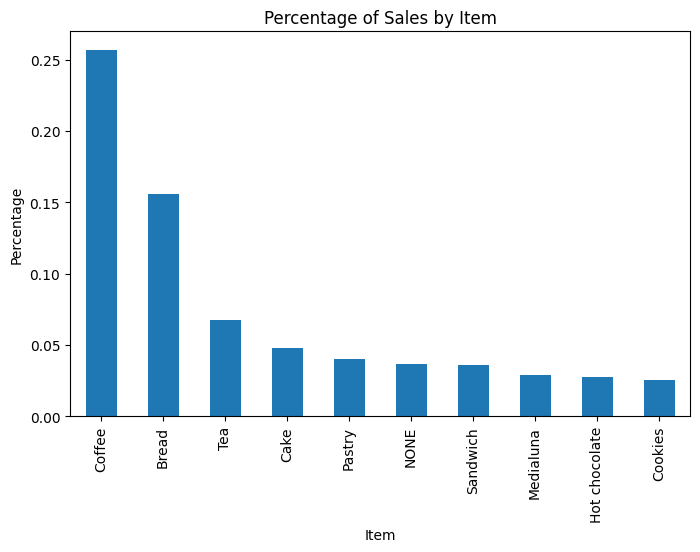

In [79]:
plt.figure(figsize=(8,5))
data['Item'].value_counts(normalize=True)[:10].plot(kind="bar", title="Percentage of Sales by Item").set(xlabel="Item", ylabel="Percentage")
plt.show()

In [80]:
data_basket = data.groupby(["Transaction","Item"]).size().reset_index(name="Count")

market_basket = (data_basket.groupby(['Transaction', 'Item'])['Count'].sum().unstack().reset_index().fillna(0).set_index('Transaction'))
market_basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
def encode_data(datapoint):
  if datapoint <= 0:
    return 0
  else:
    return 1

In [82]:
market_basket = market_basket.applymap(encode_data)

market_basket.head()

market_basket.isna().sum()

Item
Adjustment                  0
Afternoon with the baker    0
Alfajores                   0
Argentina Night             0
Art Tray                    0
                           ..
Tshirt                      0
Valentine's card            0
Vegan Feast                 0
Vegan mincepie              0
Victorian Sponge            0
Length: 95, dtype: int64

In [83]:
itemsets = apriori(market_basket, min_support= 0.02, use_colnames=True)
rules = association_rules(itemsets, metric='lift', min_threshold=0.7)

In [84]:
rules.sort_values("lift", ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235,0.444078
6,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146,0.425012
25,(Coffee),(Toast),0.475081,0.033365,0.023502,0.049470,1.482699,0.007651,1.016943,0.620199
24,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789,0.336791
14,(Coffee),(Medialuna),0.475081,0.061379,0.034939,0.073542,1.198175,0.005779,1.013129,0.315092
15,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561,0.176213
19,(Coffee),(Pastry),0.475081,0.085510,0.047214,0.099382,1.162216,0.006590,1.015402,0.265898
18,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079,0.152626
13,(Coffee),(Juice),0.475081,0.038296,0.020460,0.043065,1.124537,0.002266,1.004984,0.210976
12,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031,0.115155


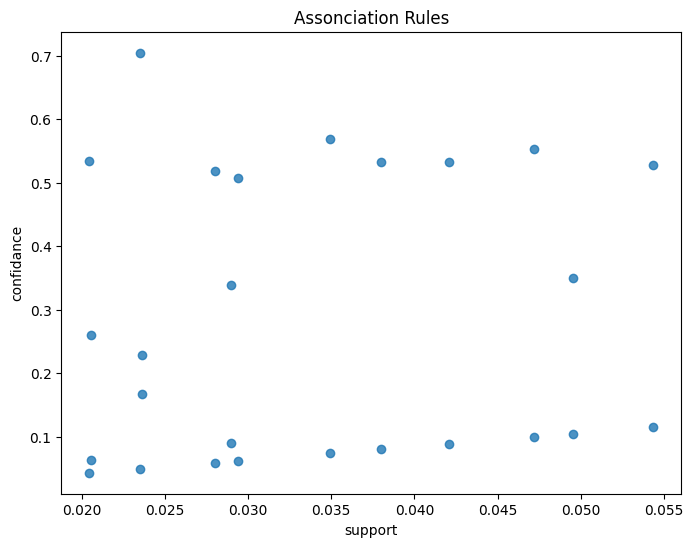

In [85]:
support = rules.support.to_numpy()
confidence = rules.confidence.to_numpy()

for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.figure(figsize=(8,6))
plt.title('Assonciation Rules')
plt.xlabel('support')
plt.ylabel('confidance')
sns.regplot(x=support, y=confidence, fit_reg=False)
plt.show()

In [86]:
rec_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] >= 0.7) ]

In [87]:
cols_keep = {'antecedents':'item_1', 'consequents':'item_2', 'support':'support', 'confidence':'confidence', 'lift':'lift'}
cols_drop = ['antecedent support', 'consequent support', 'leverage', 'conviction']

recommendation_basket = pd.DataFrame(rec_rules).rename(columns= cols_keep).drop(columns=cols_drop).sort_values(by=['lift'], ascending = False)

display(recommendation_basket)

,item_1,item_2,support,confidence,lift,zhangs_metric
24,(Toast),(Coffee),0.023502,0.704403,1.482699,0.336791
